In [1]:
import os.path
import sys
import json
import pickle

import pandas as pd
import geopandas as gpd
import numpy as np

%load_ext autoreload
%autoreload 2
%matplotlib inline

sys.path.append("../new_codebase/src/utils/")
from connect_db import db_connection

In [2]:
username='bdelpapa'

In [3]:
cred_location = '/mnt/data/'+username+'/utils/data_creds_redshift.json.nogit'
db = db_connection.DBConnection(cred_location)

In [4]:
# read shape files
r_path = "../new_codebase/src/utils/read_shapefiles/"
json_file = 'shape_files_path.json'
sys.path.append(r_path)
from read_files import read_shapefile_data, read_shapefiles_in

path_shapefiles, regions, provinces, territories, municipalities, crs = read_shapefile_data(r_path,json_file)
df_mun_tus = read_shapefiles_in(True, path_shapefiles, municipalities, crs)
df_reg = read_shapefiles_in(False, path_shapefiles, regions, crs)

In [5]:
# sample trajectory files
path = '../../../shared/cluster_results_Jul_Aug_10000_sample.csv'
df_clusters = pd.read_csv(path)
df_clusters = df_clusters.drop(columns=['Unnamed: 0', 'customer_nr'])

In [6]:
# geolocation preprocessing
r_path = "../new_codebase/src/utils/geolocation"
sys.path.append(r_path)
import preprocessing 

preprocessing.str_to_list(df_clusters)
preprocessing.descriptive_sanity_check(df_clusters)

Number of individual trips: 10000
Basic descriptives:
Mean number of visited municipalities = 75.0788
Median number of visited municipalities = 33
Min number of visited municipalities = 2
Max number of visited municipalities = 1631


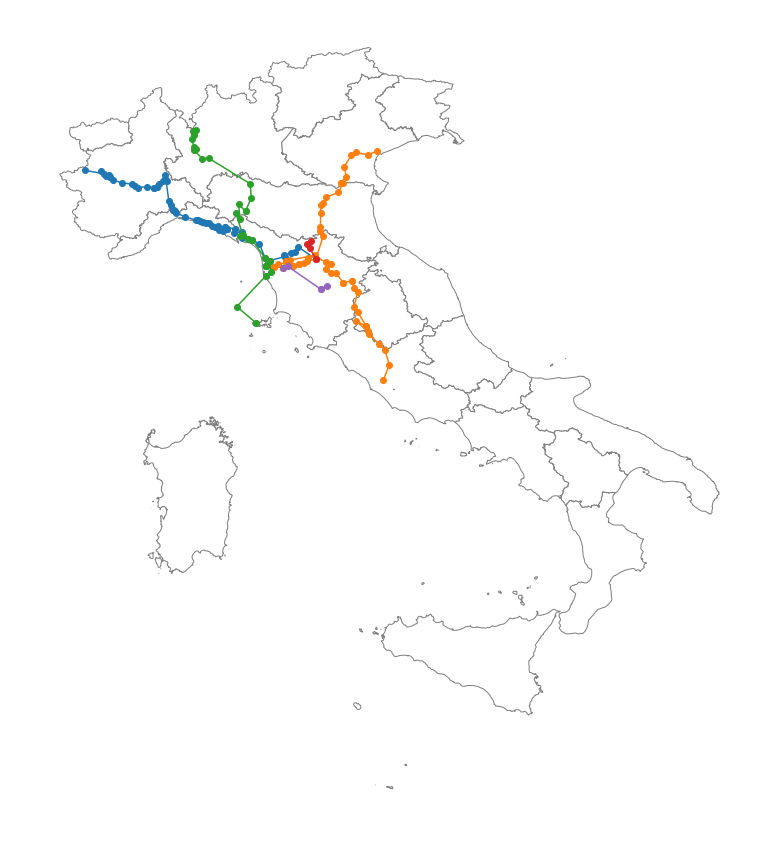

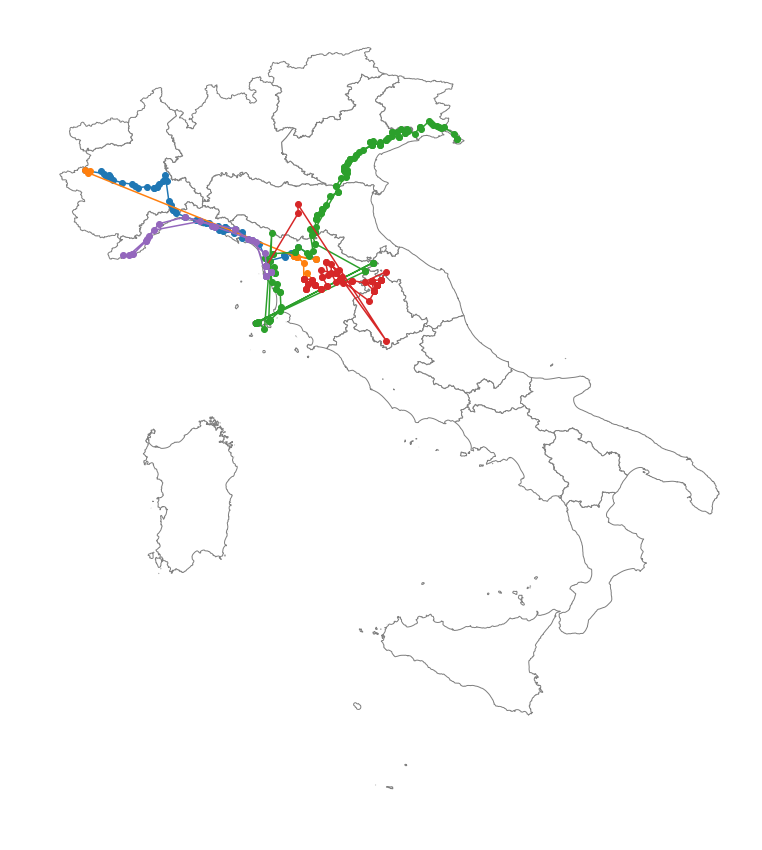

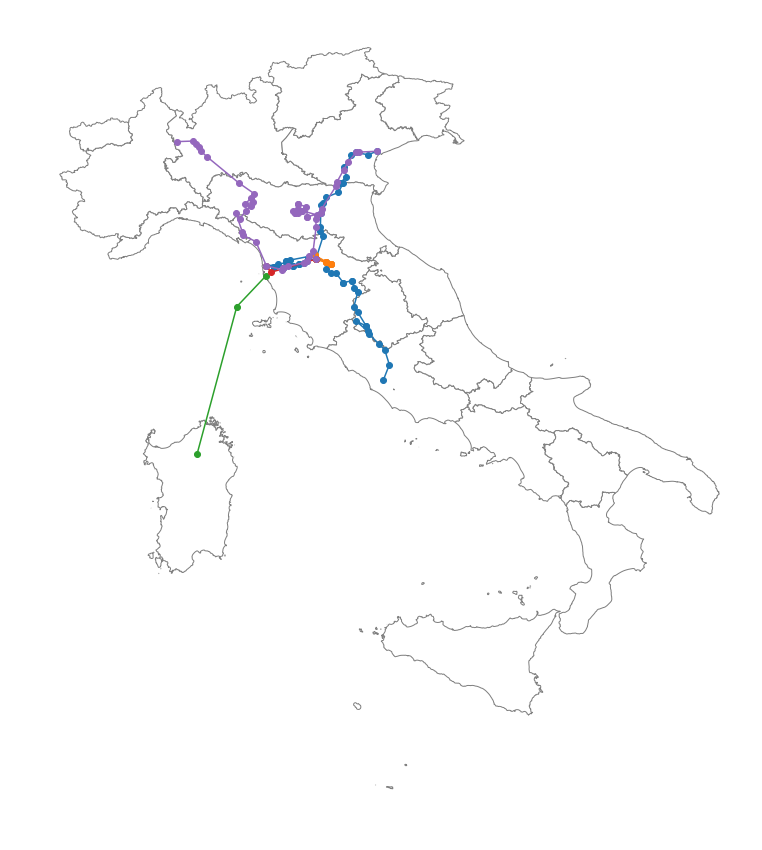

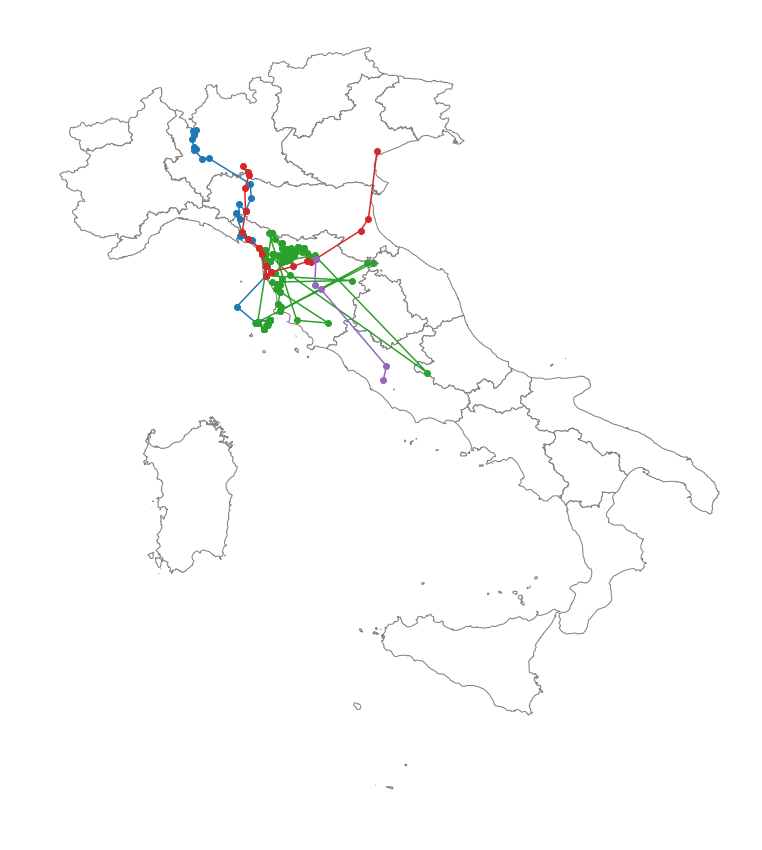

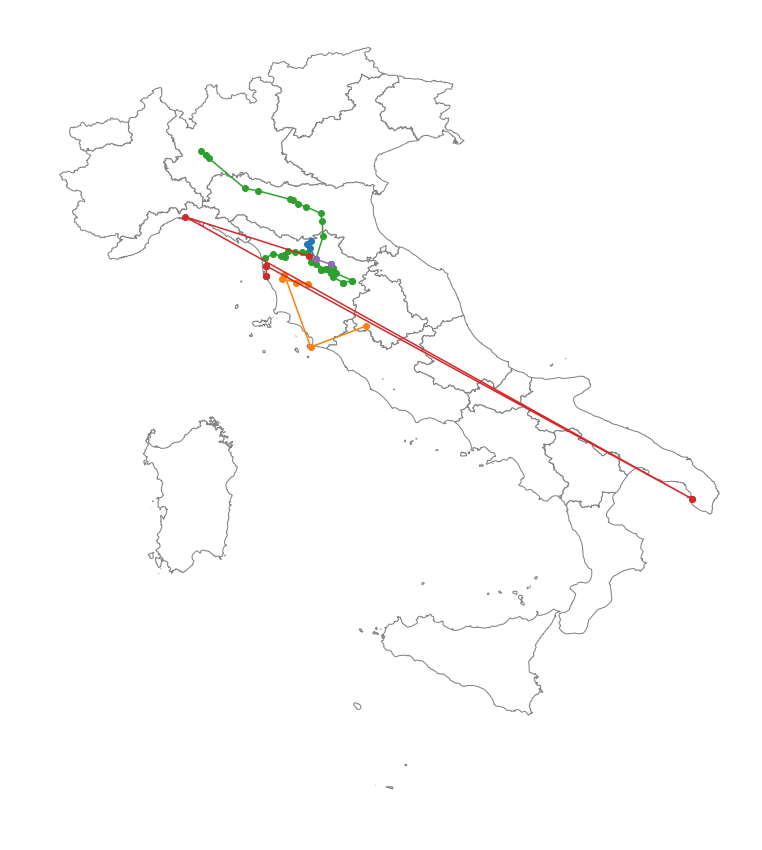

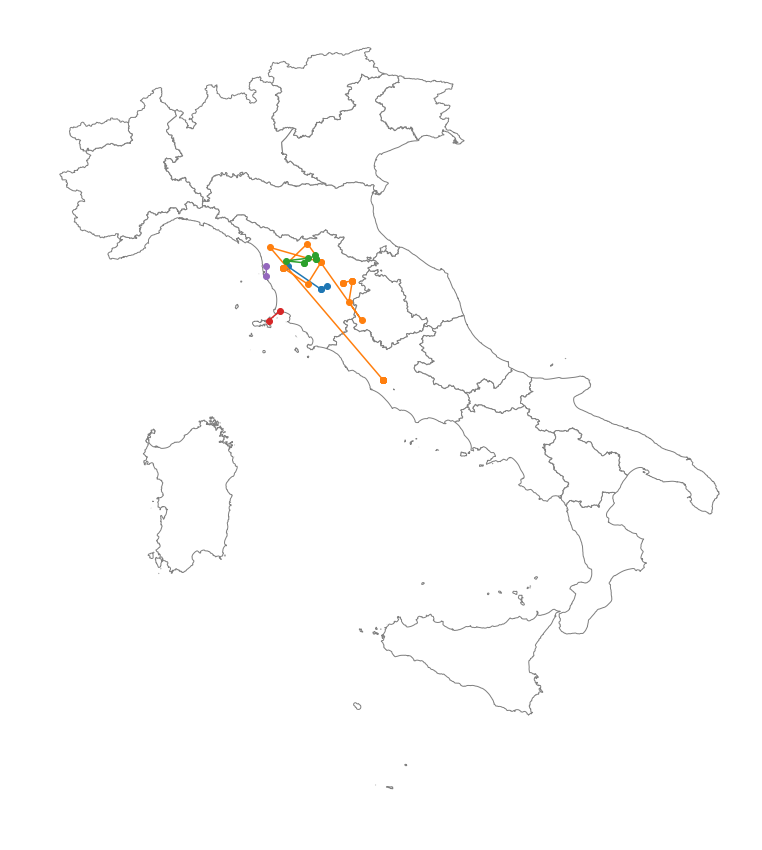

In [7]:
# plot trajectories
r_path = "../new_codebase/viz"
sys.path.append(r_path)
from maps import TrajectoryClustermap

traj = TrajectoryClustermap(df_reg, 
                            path_to_centroids = r"/mnt/data/shared/comune_centroids.csv")
traj.plot_medoids(df_clusters)
traj.plot_samples(df_clusters)

/home/bdelpapa/.conda/envs/tuscany_env/lib/python3.6/site-packages/matplotlib/colorbar.py:217: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


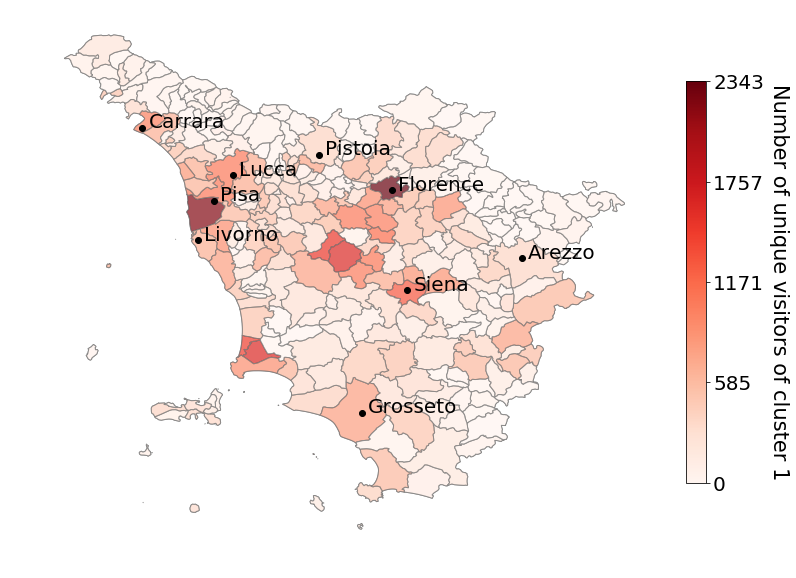

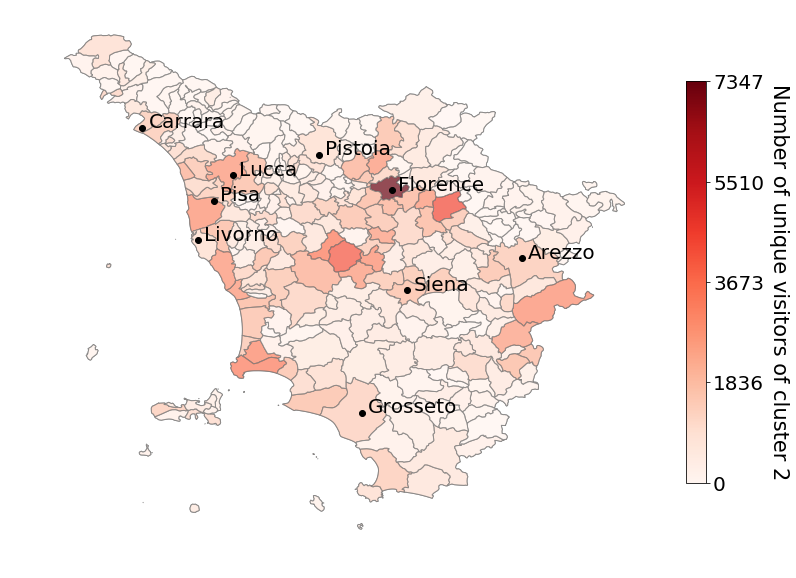

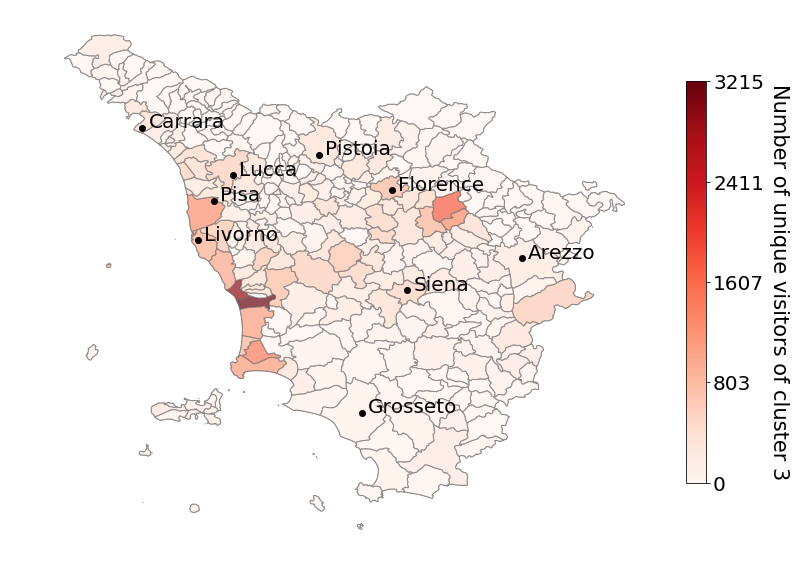

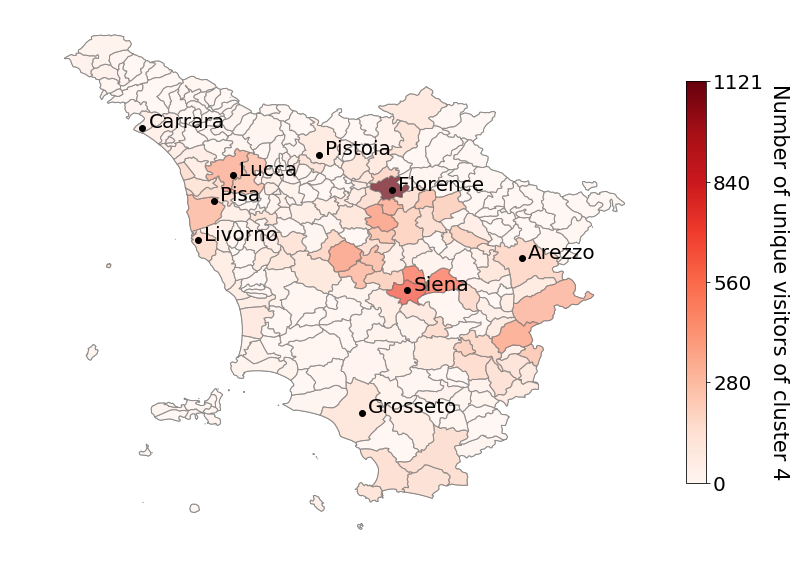

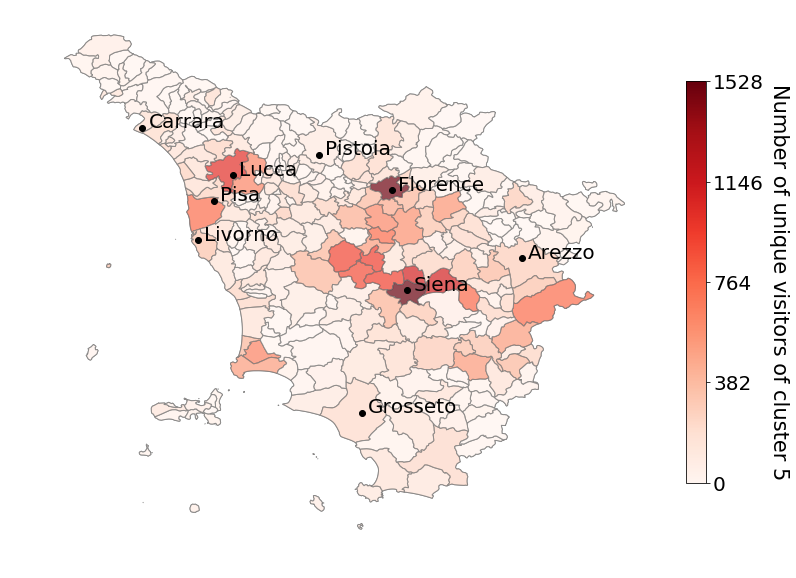

In [139]:
# plot heatmaps
traj.plot_trajectories_heatmap(df_clusters, df_mun_tus)